# Descriptive Statistics

In [9]:
#Importing Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns

In [11]:
#Importing Excel Data for Python analysis
data=pd.read_excel('C:/Users/jayan/OneDrive/Desktop/Final Marketing Project/Data.xlsx')
data.shape

(111988, 25)

In [12]:
#Display all columns & rows, Surveying the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()



,kUID,Cust#,Order_ID,Transaction_Time,Store_ID,Product,SKU,Menu_Category,Day_of_Week,Week,Month,On_or_After_5th_August,Price_Revise_Category,Introduction_of_SKU,Cust_Occurence_Sequence,Customer_ID_Count,Qty,List_Price_SKU,Price_After_Discounts_SKU,Discount/SKU,Flat_5$_meal_flag,Coupon_Code_Used,Permanent_Discount,Temporary_Discount,Discount Given
0,17121,7665,1377PMSEYO,2019-02-11 16:35:00,1377,Chipotle Chimichurri Salad with Chicken,6645,Cold Bowl,Mon,7,2,0,1,1,1,722,1,7.50,7.50,0.0,0,0,0,0,0
1,17121,7665,1377PMTV4E,2019-02-12 11:21:00,1377,Trap Kitchen Curry Chicken,6710,Hot Bowl,Tue,7,2,0,1,1,2,722,1,7.50,7.50,0.0,0,0,0,0,0
2,17121,15753,1377PMTVQM,2019-02-12 11:35:00,1377,Spaghetti (Squash) & Meatballs,6654,Hot Bowl,Tue,7,2,0,1,1,1,4,1,7.50,7.50,0.0,0,0,0,0,0
3,17121,10012,1377PMTWD4,2019-02-12 11:48:00,1377,Jamaican Jerk Chicken,6652,Hot Bowl,Tue,7,2,0,1,1,1,2,2,7.50,7.50,0.0,0,0,0,0,0
4,17121,13492,1377PMTWQY,2019-02-12 11:57:00,1377,Salmon Superfood Salad,6650,Cold Bowl,Tue,7,2,0,1,1,1,14,1,8.95,8.95,0.0,0,0,0,0,0


In [13]:
#Data Cleaning was done in Excel & hence, we have no nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111988 entries, 0 to 111987
Data columns (total 25 columns):
kUID                         111988 non-null int64
Cust#                        111988 non-null int64
Order_ID                     111988 non-null object
Transaction_Time             111988 non-null datetime64[ns]
Store_ID                     111988 non-null int64
Product                      111988 non-null object
SKU                          111988 non-null int64
Menu_Category                111988 non-null object
Day_of_Week                  111988 non-null object
Week                         111988 non-null int64
Month                        111988 non-null int64
On_or_After_5th_August       111988 non-null int64
Price_Revise_Category        111988 non-null int64
Introduction_of_SKU          111988 non-null int64
Cust_Occurence_Sequence      111988 non-null int64
Customer_ID_Count            111988 non-null int64
Qty                          111988 non-null int64
List_Pric

In [14]:
#Counting orders per customers across 9 months of February to October
df_orders=data.groupby('Cust#')['Order_ID'].nunique().reset_index().sort_values(by=['Order_ID'],ascending=False)
df_orders.columns=['Cust#','Count_of_orders']
df_orders.head()

,Cust#,Count_of_orders
7347,7665,492
13966,14585,130
5002,5229,99
9381,9801,99
1764,1844,98


In [15]:
#Finding Mean number of orders per customer over these 9 months

df_orders.iloc[:,1].mean()
#We find that on an average every customer orders 5 times over 9 months.

5.233651298357181

In [16]:
#Finding Standard deviation of orders to see spread of data
df_orders.iloc[:,1].std()

8.473214840278295

In [17]:
#Finding unique number of customers (one customer is counted once)
df_orders['Cust#'].nunique()

18870

In [18]:
#Now we look at transactions per kiosk (kUID) (How many orders placed per kiosk)
df_kiosk=data.groupby('kUID')['Order_ID'].nunique().reset_index().sort_values(by=['Order_ID'],ascending=False)
df_kiosk.columns=['kUID','No_of_Orders']
df_kiosk.head()

,kUID,No_of_Orders
37,15391,2854
17,14291,2612
101,16781,2443
131,17121,2039
12,14211,1932


In [19]:
#Finding mean transactions per Kiosk for the 9 months
df_kiosk.iloc[:,1].mean() # 587 Transactions per Kiosk

587.8511904761905

In [20]:
#Finding number of orders placed per month
df_months=data.groupby('Month')['Order_ID'].nunique().reset_index().sort_values(by=['Order_ID'],ascending=False)
df_months.columns=['Month', 'Orders Placed']
df_months.head(10)

,Month,Orders Placed
8,10,21436
6,8,19631
7,9,18623
5,7,13191
4,6,9768
3,5,8100
2,4,5213
1,3,2365
0,2,432


In [21]:
#Average number of orders placed every month
df_months.iloc[:,1].mean()

10973.222222222223

In [22]:
#Find Total Number of Kiosks - 168
df_kiosk['kUID'].nunique()

168

In [23]:
#Creating a subset of data grouped by Menu Category and Month
df_menu=data.groupby(['Menu_Category','Month'])['Order_ID'].nunique().reset_index()

#df_menu has size of each grouping, i.e. how many items were purchased in that category in specific months.
df_menu.columns=['Menu_Category','Month','No_of_Orders']
df_menu.head()

,Menu_Category,Month,No_of_Orders
0,Cold Bowl,2,148
1,Cold Bowl,3,714
2,Cold Bowl,4,1753
3,Cold Bowl,5,3047
4,Cold Bowl,6,3430


In [24]:
#Extracting Details for Cold Bowl from df_menu
df_menu[df_menu['Menu_Category']=='Cold Bowl']

,Menu_Category,Month,No_of_Orders
0,Cold Bowl,2,148
1,Cold Bowl,3,714
2,Cold Bowl,4,1753
3,Cold Bowl,5,3047
4,Cold Bowl,6,3430
5,Cold Bowl,7,3796
6,Cold Bowl,8,4764
7,Cold Bowl,9,4510
8,Cold Bowl,10,4296


In [25]:
#Details for Hot Bowl
df_menu[df_menu['Menu_Category']=='Hot Bowl']

,Menu_Category,Month,No_of_Orders
17,Hot Bowl,2,266
18,Hot Bowl,3,1386
19,Hot Bowl,4,2731
20,Hot Bowl,5,3705
21,Hot Bowl,6,4806
22,Hot Bowl,7,6372
23,Hot Bowl,8,9433
24,Hot Bowl,9,9976
25,Hot Bowl,10,13162


In [26]:
#Details for Soups
df_menu[df_menu['Menu_Category']=='Soups']


,Menu_Category,Month,No_of_Orders
34,Soups,2,30
35,Soups,3,107
36,Soups,4,140
37,Soups,5,342
38,Soups,6,414
39,Soups,7,514
40,Soups,8,788
41,Soups,9,643
42,Soups,10,695


In [27]:
#Details for Snacks
df_menu[df_menu['Menu_Category']=='Snacks']

,Menu_Category,Month,No_of_Orders
26,Snacks,3,220
27,Snacks,4,512
28,Snacks,5,929
29,Snacks,6,1168
30,Snacks,7,2135
31,Snacks,8,3440
32,Snacks,9,3225
33,Snacks,10,2573


In [28]:
#Details for Drinks
df_menu[df_menu['Menu_Category']=='Drinks']

,Menu_Category,Month,No_of_Orders
9,Drinks,3,80
10,Drinks,4,462
11,Drinks,5,759
12,Drinks,6,662
13,Drinks,7,1775
14,Drinks,8,3505
15,Drinks,9,2222
16,Drinks,10,2572


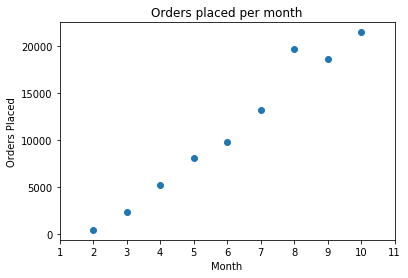

In [29]:
#Creating a plot to visualize the number of orders placed every month over the course of 9 months of our data
plt.figure()
plt.scatter(df_months['Month'],df_months['Orders Placed'])
plt.xticks(np.arange(1,12,1))
plt.title('Orders placed per month')
plt.xlabel('Month')
plt.ylabel('Orders Placed')
plt.show()

In [30]:
#Exploring Data by Menu Category to see which ones are popular?
items=data.groupby(['Menu_Category'])['Order_ID'].nunique().reset_index()
items.columns=['Menu Category', 'Total Orders']
items.sort_values('Total Orders',ascending=False)
items.head()

,Menu Category,Total Orders
0,Cold Bowl,26458
1,Drinks,12037
2,Hot Bowl,51837
3,Snacks,14202
4,Soups,3673


In [31]:
#Exploring how number of orders vary based upon the day of the week
weekly_orders=data.groupby('Day_of_Week')['Order_ID'].nunique().reset_index().sort_values(by=['Order_ID'],ascending=False)
x = {'Day': ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'],'Orders Placed': [27048,22573,24810,20504,12853,2534,1486]}
weekly_orders = pd.DataFrame.from_dict(x)
weekly_orders


,Day,Orders Placed
0,Mon,27048
1,Tues,22573
2,Wed,24810
3,Thurs,20504
4,Fri,12853
5,Sat,2534
6,Sun,1486


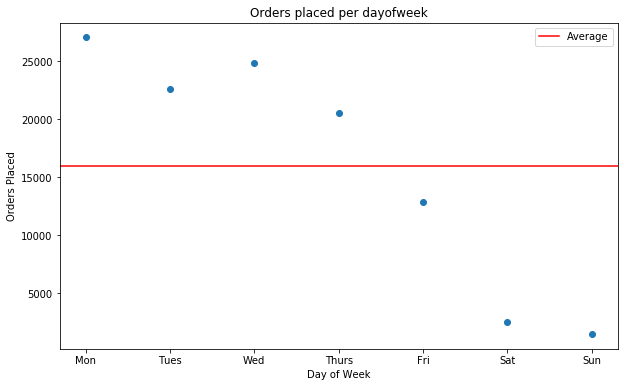

In [32]:
#Creating a plot for Number of orders per day of the week
plt.figure(figsize=(10,6))
plt.scatter(weekly_orders['Day'],weekly_orders['Orders Placed'])
plt.title('Orders placed per dayofweek')
plt.xlabel('Day of Week')
plt.ylabel('Orders Placed')
plt.axhline(weekly_orders['Orders Placed'].mean(),label='Average',c='red')
plt.legend()
plt.show()

In [33]:
#Number of Orders when different discounts were applied
discount=data.groupby('Discount/SKU')['Order_ID'].nunique().reset_index().sort_values(by=['Discount/SKU'],ascending=False)

In [34]:
discount=discount[discount.iloc[:,0]>0].sort_values(by='Order_ID',ascending=False)

#Showing only top 5 rows with head() , shows type of discount and orders
discount.head()

,Discount/SKU,Order_ID
96,2.39,855
92,2.25,832
43,1.19,784
83,2.00,725
63,1.59,683


In [35]:
#Analysing Specific SKUs-product, to see the popular items (sorted data)

sku=data.groupby(['SKU','Product','Menu_Category'])['Order_ID'].nunique().reset_index().sort_values(by=['Order_ID'],ascending=False)
sku.columns=['SKU','Product','Category','Orders']

# Shows top 5 popular items
sku.head()

,SKU,Product,Category,Orders
11,6654,Spaghetti (Squash) & Meatballs,Hot Bowl,8588
12,6655,Sesame Teriyaki Chicken,Hot Bowl,7410
18,6710,Trap Kitchen Curry Chicken,Hot Bowl,6086
7,6650,Salmon Superfood Salad,Cold Bowl,5803
1,6644,Kale Chicken Caesar Salad,Cold Bowl,5623


In [36]:
#Kiosk Level Analysis (Count of different SKUs sold on each Kiosk)

kiosk=data.groupby(['kUID','SKU','Menu_Category'])['Order_ID'].nunique().reset_index().sort_values(by=['Order_ID'],ascending=False)
kiosk.columns=['Kiosk','SKU','Category','Orders']
kiosk.head()

,Kiosk,SKU,Category,Orders
1579,15391,6654,Hot Bowl,380
1580,15391,6655,Hot Bowl,276
1585,15391,6710,Hot Bowl,275
1576,15391,6650,Cold Bowl,266
655,14291,6710,Hot Bowl,265


In [37]:
#Which SKU is sold maximum at each kiosk
kmax = kiosk[['Kiosk','SKU','Category','Orders']].groupby('Kiosk')['Orders'].idxmax()
kmax = list(kmax)
kmax
kiosk.loc[kmax].sort_values(by='Orders',ascending = False).head(10)

,Kiosk,SKU,Category,Orders
1579,15391,6654,Hot Bowl,380
655,14291,6710,Hot Bowl,265
4333,16781,6654,Hot Bowl,249
605,14281,6655,Hot Bowl,225
5475,17121,6644,Cold Bowl,224
2445,16031,6654,Hot Bowl,206
124,13792,6654,Hot Bowl,180
480,14211,6710,Hot Bowl,179
2235,15701,6654,Hot Bowl,165
1712,15421,6655,Hot Bowl,148


In [38]:
#Which SKU is sold minimum at each kiosk
kmin = kiosk[['Kiosk','SKU','Category','Orders']].groupby('Kiosk')['Orders'].idxmin()
kmin = list(kmin)
kmin
kiosk.loc[kmin].sort_values(by='Orders',ascending = False).head()

,Kiosk,SKU,Category,Orders
5251,17051,8114,Drinks,3
5415,17101,6811,Snacks,2
4374,16781,8114,Drinks,2
5033,16991,8156,Soups,2
6012,17271,7545,Drinks,2


In [39]:
#Shows total orders per kiosk
#Which are the top 5 kiosks
data.groupby('kUID')['Order_ID'].count().sort_values(ascending=False).reset_index().head()

,kUID,Order_ID
0,15391,3029
1,14291,2899
2,16781,2642
3,17121,2281
4,14211,2099


In [40]:
#Lets Change track and see Kiosks and their rise
data.head()

,kUID,Cust#,Order_ID,Transaction_Time,Store_ID,Product,SKU,Menu_Category,Day_of_Week,Week,Month,On_or_After_5th_August,Price_Revise_Category,Introduction_of_SKU,Cust_Occurence_Sequence,Customer_ID_Count,Qty,List_Price_SKU,Price_After_Discounts_SKU,Discount/SKU,Flat_5$_meal_flag,Coupon_Code_Used,Permanent_Discount,Temporary_Discount,Discount Given
0,17121,7665,1377PMSEYO,2019-02-11 16:35:00,1377,Chipotle Chimichurri Salad with Chicken,6645,Cold Bowl,Mon,7,2,0,1,1,1,722,1,7.50,7.50,0.0,0,0,0,0,0
1,17121,7665,1377PMTV4E,2019-02-12 11:21:00,1377,Trap Kitchen Curry Chicken,6710,Hot Bowl,Tue,7,2,0,1,1,2,722,1,7.50,7.50,0.0,0,0,0,0,0
2,17121,15753,1377PMTVQM,2019-02-12 11:35:00,1377,Spaghetti (Squash) & Meatballs,6654,Hot Bowl,Tue,7,2,0,1,1,1,4,1,7.50,7.50,0.0,0,0,0,0,0
3,17121,10012,1377PMTWD4,2019-02-12 11:48:00,1377,Jamaican Jerk Chicken,6652,Hot Bowl,Tue,7,2,0,1,1,1,2,2,7.50,7.50,0.0,0,0,0,0,0
4,17121,13492,1377PMTWQY,2019-02-12 11:57:00,1377,Salmon Superfood Salad,6650,Cold Bowl,Tue,7,2,0,1,1,1,14,1,8.95,8.95,0.0,0,0,0,0,0


In [41]:
kiosksrise=pd.DataFrame(data.groupby('Month')['kUID'].nunique()).reset_index()
kiosksrise.head()

,Month,kUID
0,2,6
1,3,16
2,4,34
3,5,51
4,6,63


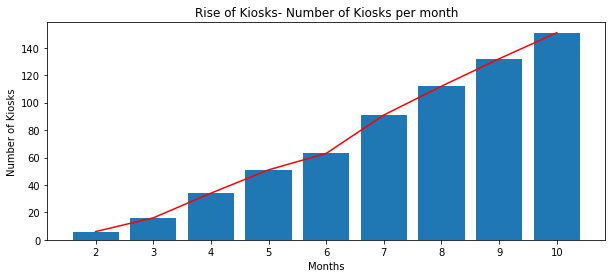

In [42]:
#Number of Kiosks per month - A rise of Kiosks - Good trend!
plt.figure(figsize=(10,4))
plt.bar(height=kiosksrise.iloc[:,1],x=kiosksrise.iloc[:,0])
plt.plot(kiosksrise.iloc[:,0],kiosksrise.iloc[:,1],c='red')
plt.xticks(np.arange(2,11,1))
plt.title('Rise of Kiosks- Number of Kiosks per month')
plt.xlabel('Months')
plt.ylabel('Number of Kiosks')
plt.show()


In [43]:
#Most popular SKUs (products)

In [44]:
data.head()

,kUID,Cust#,Order_ID,Transaction_Time,Store_ID,Product,SKU,Menu_Category,Day_of_Week,Week,Month,On_or_After_5th_August,Price_Revise_Category,Introduction_of_SKU,Cust_Occurence_Sequence,Customer_ID_Count,Qty,List_Price_SKU,Price_After_Discounts_SKU,Discount/SKU,Flat_5$_meal_flag,Coupon_Code_Used,Permanent_Discount,Temporary_Discount,Discount Given
0,17121,7665,1377PMSEYO,2019-02-11 16:35:00,1377,Chipotle Chimichurri Salad with Chicken,6645,Cold Bowl,Mon,7,2,0,1,1,1,722,1,7.50,7.50,0.0,0,0,0,0,0
1,17121,7665,1377PMTV4E,2019-02-12 11:21:00,1377,Trap Kitchen Curry Chicken,6710,Hot Bowl,Tue,7,2,0,1,1,2,722,1,7.50,7.50,0.0,0,0,0,0,0
2,17121,15753,1377PMTVQM,2019-02-12 11:35:00,1377,Spaghetti (Squash) & Meatballs,6654,Hot Bowl,Tue,7,2,0,1,1,1,4,1,7.50,7.50,0.0,0,0,0,0,0
3,17121,10012,1377PMTWD4,2019-02-12 11:48:00,1377,Jamaican Jerk Chicken,6652,Hot Bowl,Tue,7,2,0,1,1,1,2,2,7.50,7.50,0.0,0,0,0,0,0
4,17121,13492,1377PMTWQY,2019-02-12 11:57:00,1377,Salmon Superfood Salad,6650,Cold Bowl,Tue,7,2,0,1,1,1,14,1,8.95,8.95,0.0,0,0,0,0,0


In [45]:
#Product popularity by number of products
Product_popular=data.groupby('Product')['Order_ID'].nunique().reset_index().sort_values(by = 'Order_ID',ascending = False)
Product_popular.columns=['Product','Number of orders']
Product_popular.head()

,Product,Number of orders
47,Spaghetti (Squash) & Meatballs,8588
44,Sesame Teriyaki Chicken,7410
53,Trap Kitchen Curry Chicken,6086
43,Salmon Superfood Salad,5803
24,Kale Chicken Caesar Salad,5623


In [46]:
#Product popularity by number of customers
prodcust=pd.DataFrame(data.groupby('Product')['Cust#'].nunique()).reset_index().sort_values(by = 'Cust#',ascending = False)
prodcust.columns=['Product','Count_of_unique_customers']
prodcust.head()

,Product,Count_of_unique_customers
47,Spaghetti (Squash) & Meatballs,4271
44,Sesame Teriyaki Chicken,4257
53,Trap Kitchen Curry Chicken,3122
24,Kale Chicken Caesar Salad,2911
43,Salmon Superfood Salad,2860


In [47]:
#Compare top 5 popular products by number of orders & number of Customers that order those products.

In [48]:
#How many customers and orders we have had for popular items over 9 months.
print(prodcust.head())
print(Product_popular.head())

                           Product  Count_of_unique_customers
47  Spaghetti (Squash) & Meatballs                       4271
44         Sesame Teriyaki Chicken                       4257
53      Trap Kitchen Curry Chicken                       3122
24       Kale Chicken Caesar Salad                       2911
43          Salmon Superfood Salad                       2860
                           Product  Number of orders
47  Spaghetti (Squash) & Meatballs              8588
44         Sesame Teriyaki Chicken              7410
53      Trap Kitchen Curry Chicken              6086
43          Salmon Superfood Salad              5803
24       Kale Chicken Caesar Salad              5623


In [49]:
#How many 'unique' SKUs are offered per menu category
menu=pd.DataFrame(data.groupby('Menu_Category')['SKU'].nunique()).reset_index().sort_values('SKU',ascending=False)
menu.head()

,Menu_Category,SKU
2,Hot Bowl,22
1,Drinks,14
3,Snacks,10
0,Cold Bowl,9
4,Soups,3


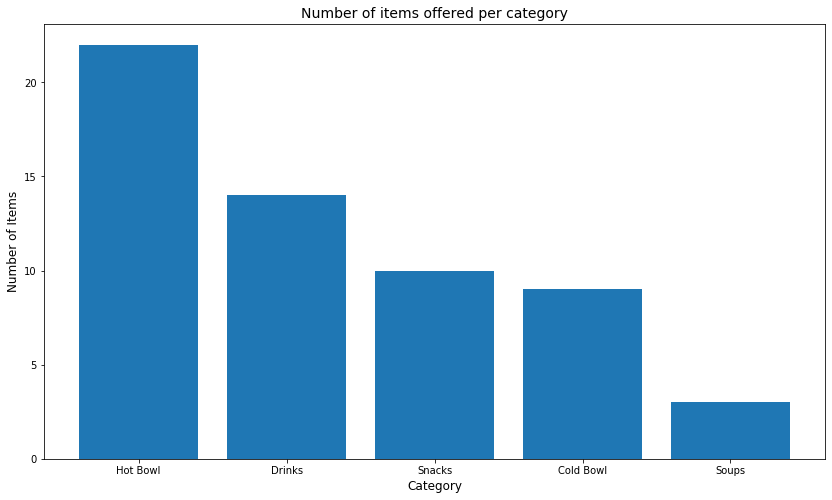

In [50]:
#Number of items offered per menu category
plt.figure(figsize=(14,8))
plt.bar(x='Menu_Category',height='SKU',data=menu)
plt.title('Number of items offered per category',fontsize=14)
plt.ylabel('Number of Items',fontsize=12)
plt.xlabel('Category',fontsize=12)
plt.show()

In [51]:
#Menu Category orders across months
menumonth=pd.DataFrame(data.groupby(['Menu_Category','Month'])['Order_ID'].nunique()).reset_index()
#Changing column names
menumonth.columns=['Menu_Category','Month','Orders']
menumonth.head(5)

,Menu_Category,Month,Orders
0,Cold Bowl,2,148
1,Cold Bowl,3,714
2,Cold Bowl,4,1753
3,Cold Bowl,5,3047
4,Cold Bowl,6,3430


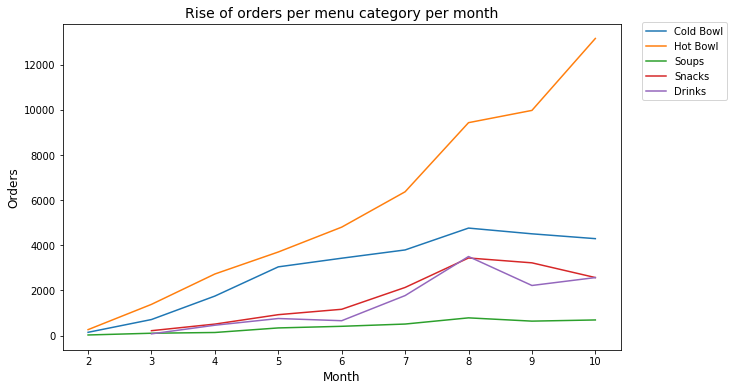

In [52]:
#Trend of number of orders per month per menu category
plt.figure(figsize=(10,6))
for i in data['Menu_Category'].unique():
    c=menumonth[menumonth.loc[:,'Menu_Category']==i]
    plt.plot('Month','Orders',label=i, data=c)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1.02))
plt.title('Rise of orders per menu category per month',fontsize=14)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Orders',fontsize=12)
plt.show()

In [53]:
#How did they add options/products in each category per month ? 
menupermonth=pd.DataFrame(data.groupby(['Menu_Category','Month'])['SKU'].nunique())
menupermonth.head(10)

SKU
Menu_Category Month     
Cold Bowl     2        5
              3        5
              4        6
              5        7
              6        7
              7        7
              8        7
              9        8
              10       9
Drinks        3        2

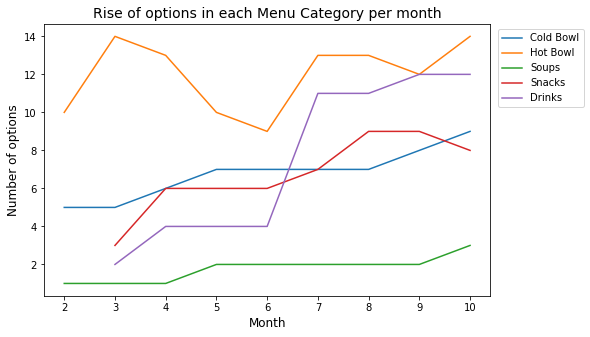

In [54]:
#Plotting rise of options
menupermonth=menupermonth.reset_index()
plt.figure(figsize=(8,5))
for i in data['Menu_Category'].unique():
    p=menupermonth[menupermonth.loc[:,'Menu_Category']==i]
    plt.plot('Month','SKU',label=i, data=p)
plt.legend(loc='upper right',bbox_to_anchor=(1.22,1))
plt.title('Rise of options in each Menu Category per month',fontsize=14)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Number of options',fontsize=12)
plt.show()

In [55]:
#How many percentage of' Kiosks' (One kUID counted once) have that product ?
kiosk_products=pd.DataFrame(data.groupby('Product')['kUID'].nunique()/data['kUID'].nunique()*100).reset_index().sort_values('kUID',ascending=False)
kiosk_products.head()
#Now we can see in how many % of total kiosks we have specific products.
#For example Popular Spaghetti & Meatballs is available at 99.4% of all kiosks

,Product,kUID
47,Spaghetti (Squash) & Meatballs,99.404762
53,Trap Kitchen Curry Chicken,98.809524
44,Sesame Teriyaki Chicken,98.809524
43,Salmon Superfood Salad,98.214286
5,Carnitas Bowl,97.023810


In [56]:
#Finding Correlation between Number of orders & Kiosk Availability
#Does orders increase by increase the availability of items at different kiosks ? - Yes!
corr1=pd.merge(kiosk_products,prodcust,on='Product',how='inner')
corr1.columns=['Product','kUID', 'Orders']
corr1.head()

,Product,kUID,Orders
0,Spaghetti (Squash) & Meatballs,99.404762,4271
1,Trap Kitchen Curry Chicken,98.809524,3122
2,Sesame Teriyaki Chicken,98.809524,4257
3,Salmon Superfood Salad,98.214286,2860
4,Carnitas Bowl,97.023810,2742


In [57]:
#Finding correlation between Kiosk availability & Number of orders
#there seems to be a strong correlation between Kiosk availability and popularity (orders)
#So the ones that are popular have higher kiosk availability & number of orders.
corr1['kUID'].corr(corr1['Orders']) 

0.7494612153302417

In [58]:
#Now we create a subset of customers when they first appeared
first_transaction=data[data['Cust_Occurence_Sequence']==1]
first_tran_edit=first_transaction[['Cust#','Product','Cust_Occurence_Sequence']]
first_tran_edit.head()

,Cust#,Product,Cust_Occurence_Sequence
0,7665,Chipotle Chimichurri Salad with Chicken,1
2,15753,Spaghetti (Squash) & Meatballs,1
3,10012,Jamaican Jerk Chicken,1
4,13492,Salmon Superfood Salad,1
5,3575,Salmon Superfood Salad,1


In [59]:
#What do these customers buy on the first purchase, is there a pattern ?
firstcus=pd.DataFrame(first_transaction.groupby('Product')['Cust_Occurence_Sequence'].count()).reset_index().sort_values('Cust_Occurence_Sequence',ascending=False)
firstcus.head()
#Seems like the first purchase of customers corresponds to the five most popular items
#So on their first purchase they buy the most popular items

,Product,Cust_Occurence_Sequence
42,Sesame Teriyaki Chicken,1704
45,Spaghetti (Squash) & Meatballs,1541
41,Salmon Superfood Salad,1149
22,Kale Chicken Caesar Salad,1144
51,Trap Kitchen Curry Chicken,1037


In [60]:
#What happens on their second purchase ? Do they still buy the same stuff or try something different than first purchase
#Customer's Second transactions. Was it the same as their first ?
#Creating a subject of the customers' second appearance
nonfirst=data[data['Cust_Occurence_Sequence']==2]
nonfirst.head()

,kUID,Cust#,Order_ID,Transaction_Time,Store_ID,Product,SKU,Menu_Category,Day_of_Week,Week,Month,On_or_After_5th_August,Price_Revise_Category,Introduction_of_SKU,Cust_Occurence_Sequence,Customer_ID_Count,Qty,List_Price_SKU,Price_After_Discounts_SKU,Discount/SKU,Flat_5$_meal_flag,Coupon_Code_Used,Permanent_Discount,Temporary_Discount,Discount Given
1,17121,7665,1377PMTV4E,2019-02-12 11:21:00,1377,Trap Kitchen Curry Chicken,6710,Hot Bowl,Tue,7,2,0,1,1,2,722,1,7.50,7.50,0.0,0,0,0,0,0
17,17121,3575,1377PMU95Z,2019-02-12 16:25:00,1377,Chipotle Chimichurri Salad with Chicken,6645,Cold Bowl,Tue,7,2,0,1,0,2,37,1,7.50,7.50,0.0,0,0,0,0,0
21,17121,7402,1377PMVP14,2019-02-13 11:05:00,1377,Yucatan Chili,6659,Soups,Wed,7,2,0,1,0,2,21,1,7.50,7.50,0.0,0,0,0,0,0
24,17121,14949,1377PMVPOY,2019-02-13 11:19:00,1377,Spaghetti (Squash) & Meatballs,6654,Hot Bowl,Wed,7,2,0,1,0,2,3,1,7.50,7.50,0.0,0,0,0,0,0
32,17121,16281,1377PMVSIJ,2019-02-13 12:20:00,1377,Salmon Superfood Salad,6650,Cold Bowl,Wed,7,2,0,1,0,2,4,1,8.95,8.95,0.0,0,0,0,0,0


In [61]:
#Taking only required columns
nonfir_edit=nonfirst[['Cust#','Product','Cust_Occurence_Sequence']]
nonfir_edit.head()

,Cust#,Product,Cust_Occurence_Sequence
1,7665,Trap Kitchen Curry Chicken,2
17,3575,Chipotle Chimichurri Salad with Chicken,2
21,7402,Yucatan Chili,2
24,14949,Spaghetti (Squash) & Meatballs,2
32,16281,Salmon Superfood Salad,2


In [62]:
#Product_X is first item they bought, Product_Y is second purchase.
#Shows which customers were willing to try new stuff on their second purchase
#Merging the first and second purchase datasets
newstuff=pd.merge(first_tran_edit,nonfir_edit,on='Cust#',how='inner')
newstuff.head()

,Cust#,Product_x,Cust_Occurence_Sequence_x,Product_y,Cust_Occurence_Sequence_y
0,7665,Chipotle Chimichurri Salad with Chicken,1,Trap Kitchen Curry Chicken,2
1,15753,Spaghetti (Squash) & Meatballs,1,Mediterranean Grain Bowl,2
2,10012,Jamaican Jerk Chicken,1,Sesame Teriyaki Chicken,2
3,13492,Salmon Superfood Salad,1,Gluten Free Chocolate Chip Cookie,2
4,3575,Salmon Superfood Salad,1,Chipotle Chimichurri Salad with Chicken,2


In [63]:
#newstuff_12 will contain all data where 1st and 2nd purchases were NOT same.
newstuff_12=newstuff[newstuff['Product_x']!=newstuff['Product_y']]
newstuff_12.head()

,Cust#,Product_x,Cust_Occurence_Sequence_x,Product_y,Cust_Occurence_Sequence_y
0,7665,Chipotle Chimichurri Salad with Chicken,1,Trap Kitchen Curry Chicken,2
1,15753,Spaghetti (Squash) & Meatballs,1,Mediterranean Grain Bowl,2
2,10012,Jamaican Jerk Chicken,1,Sesame Teriyaki Chicken,2
3,13492,Salmon Superfood Salad,1,Gluten Free Chocolate Chip Cookie,2
4,3575,Salmon Superfood Salad,1,Chipotle Chimichurri Salad with Chicken,2


In [64]:
#10554 customers tried sth new on the second purchase
newstuff_12['Cust#'].nunique()

10554

In [65]:
#Dividing by total customers to see what % tried something new second time.
#Which is almost 55.93% Customers are willing to buy new stuff on second purchase !!
newstuff_12['Cust#'].nunique()/data['Cust#'].nunique()*100

55.93004769475358

In [66]:
#How was the monthly pattern for first time customer appearance
newfi=data[data['Cust_Occurence_Sequence']==1]
newfi.head()

,kUID,Cust#,Order_ID,Transaction_Time,Store_ID,Product,SKU,Menu_Category,Day_of_Week,Week,Month,On_or_After_5th_August,Price_Revise_Category,Introduction_of_SKU,Cust_Occurence_Sequence,Customer_ID_Count,Qty,List_Price_SKU,Price_After_Discounts_SKU,Discount/SKU,Flat_5$_meal_flag,Coupon_Code_Used,Permanent_Discount,Temporary_Discount,Discount Given
0,17121,7665,1377PMSEYO,2019-02-11 16:35:00,1377,Chipotle Chimichurri Salad with Chicken,6645,Cold Bowl,Mon,7,2,0,1,1,1,722,1,7.50,7.50,0.0,0,0,0,0,0
2,17121,15753,1377PMTVQM,2019-02-12 11:35:00,1377,Spaghetti (Squash) & Meatballs,6654,Hot Bowl,Tue,7,2,0,1,1,1,4,1,7.50,7.50,0.0,0,0,0,0,0
3,17121,10012,1377PMTWD4,2019-02-12 11:48:00,1377,Jamaican Jerk Chicken,6652,Hot Bowl,Tue,7,2,0,1,1,1,2,2,7.50,7.50,0.0,0,0,0,0,0
4,17121,13492,1377PMTWQY,2019-02-12 11:57:00,1377,Salmon Superfood Salad,6650,Cold Bowl,Tue,7,2,0,1,1,1,14,1,8.95,8.95,0.0,0,0,0,0,0
5,17121,3575,1377PMTWSY,2019-02-12 11:58:00,1377,Salmon Superfood Salad,6650,Cold Bowl,Tue,7,2,0,1,0,1,37,1,8.95,8.95,0.0,0,0,0,0,0


In [67]:
occumonth=pd.DataFrame(newfi.groupby('Month')['Cust_Occurence_Sequence'].count()).reset_index()
occumonth.columns=['Month','Customers_Appeared_First']
occumonth

,Month,Customers_Appeared_First
0,2,234
1,3,750
2,4,1476
3,5,1933
4,6,2003
5,7,2887
6,8,3421
7,9,2981
8,10,3174


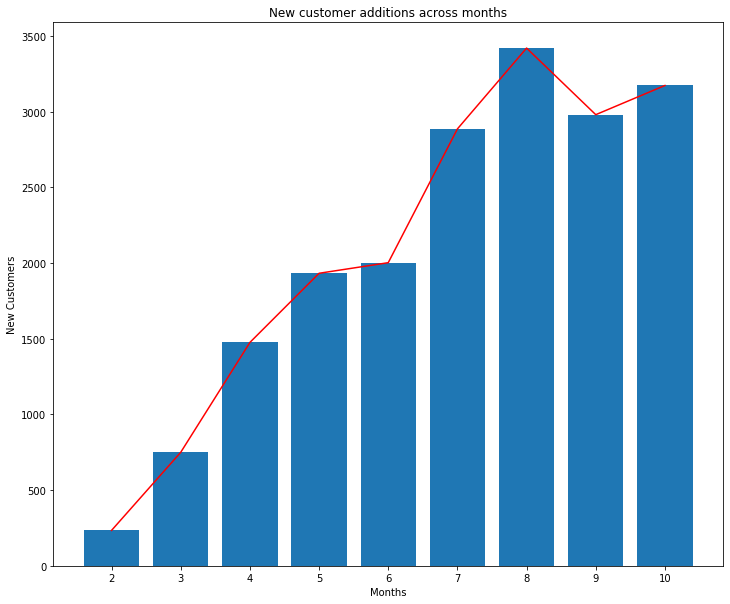

In [68]:
#Plot first customer occurences by month
plt.figure(figsize=(12,10))
plt.bar(x ='Month',height='Customers_Appeared_First',data=occumonth)
plt.plot(occumonth.iloc[:,0],occumonth.iloc[:,1],c='red')
plt.xticks(np.arange(2,11,1))
plt.title('New customer additions across months')
plt.xlabel('Months')
plt.ylabel('New Customers')
plt.show()